client id: ['04383b5618f4d8d8ef2b075c6e24f754ac6c0795717058f7e330bcd09e1e835f3e854446fda612edf59a9159f87a4475a1fad99f520e9df05caabe23d304af28', '049331a0346569d9b41738e0f31f495d097afc16eb54efc5f27518208f9c7ed004bb26d5a32fd6336a425b7768ffb3ead7a5fab8507ef2329be5e77359d6cee1', '05dcd675ff28c44de2d0bd7030c78fb36acf063b2c4637efb8496706947a73aeeddb95018e589fc7a96fa64d5a67220492e13dfb7ffd49b4f959512f3d55328e', '0db436d79939c80652cff5594757cf7a702d90321a100acb25d16586cc946fcd26e099a79996b73208bcce6d6364542e0654751a15f67d46e5cc5c3acc9c1783', '132887d56b0a8a5fc31dda4427b695133e69d6748b660267b866a39104419cfb642bc0eb4f1a5f21f63b3286841e37e0e709cc3a4aa03aac812e0af21314ff93', '1653ff7efc02d8f0e0d8be05adb19e1bfca543cee27730a522095473492bc9e3651c3f827725b8d4e4c57509f58ffccd0201d1bb4afb4136b9ab45e90b7f981d', '1c9bb0afebfe84890b58ee511a58fc0dd5620b863d7497c57f5b9a9a42d9418ff3b7206297ffac7949e386229705eddcb3bdadebacdf117ff4525357f283d110', '1e848413a3350d126cf0ce308fdae55242765ba6161db0d0efeff88d99a818d

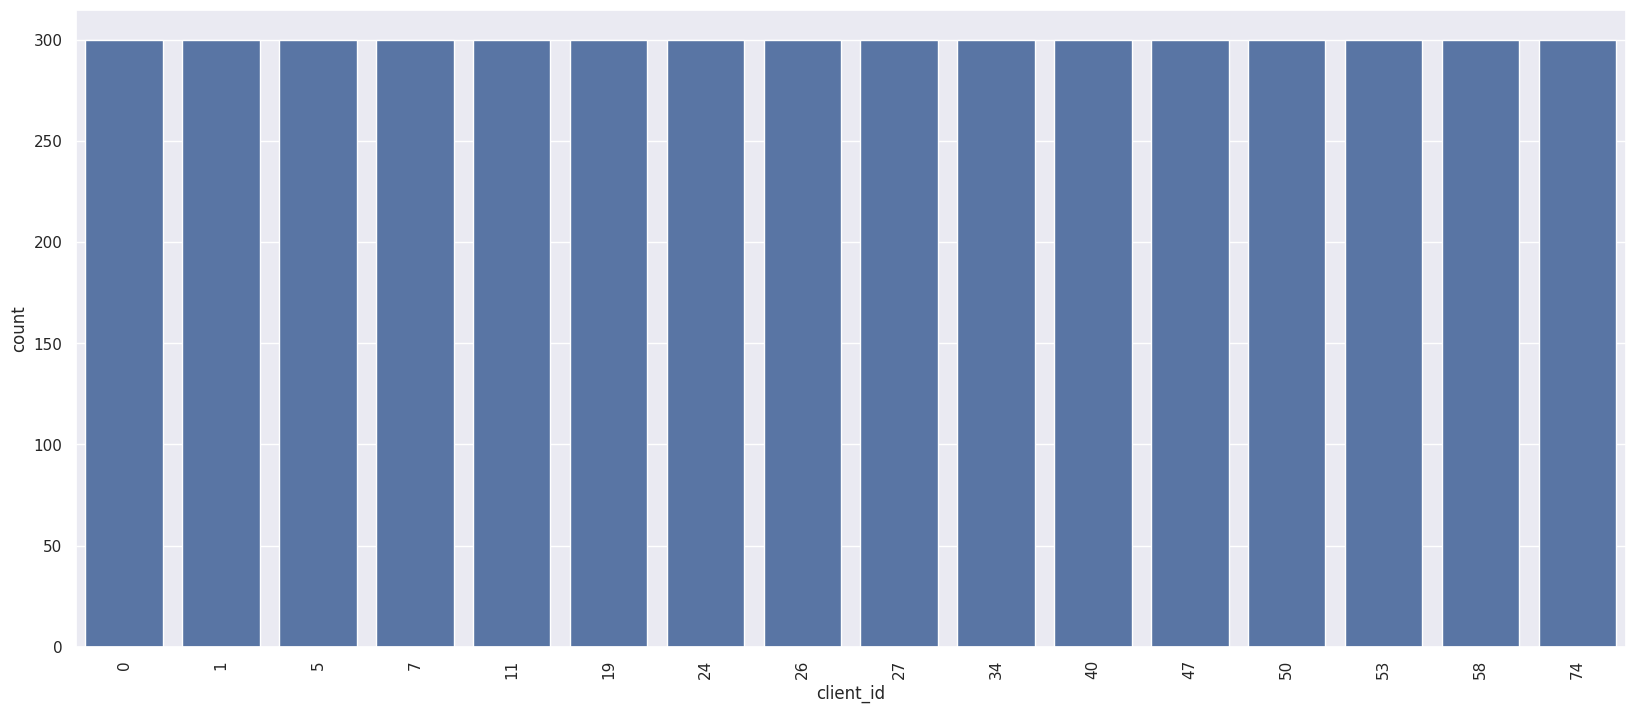

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataframe = pd.read_table("./dataset/train.tsv")
dataframe = dataframe.drop(columns=["accent", "sentence"])


client_ids = dataframe.groupby(["client_id"]).sum().reset_index()["client_id"].tolist()
new_client_id = [x for x in range(len(client_ids) + 1)]

print("client id:", client_ids)
def rename_client(row):
    return client_ids.index(row["client_id"])
    
# * Rename client id
dataframe["client_id"] = dataframe.apply(rename_client, axis=1)

print("client id:", dataframe["client_id"])

filtered = pd.DataFrame(columns=dataframe.columns)
occurances = dataframe.groupby("client_id").size()

last_id = 0
index = 0
for occurance in occurances.items():
    if(occurance[1] > 300):
        id = occurance[0]
        if(index <= 100):
            filtered = pd.concat([filtered, dataframe.query("client_id == @id")], ignore_index=True) 

grouped = filtered.groupby("client_id")
filtered = grouped.head(300)
filtered = filtered.query("up_votes >= 2")
sns.set_theme(rc={'figure.figsize':(20,8.27)})

sns.countplot(x=filtered["client_id"]) # plot the categories
plt.xticks(rotation=90);
